In [1]:
#1: Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
##2. reading excel and Converting the dataset to a pandas DataFrame
df=pd.read_csv('Student_performance_10k1.csv')
df

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,Male,Group D,Some college,Standard,Complete,89,38.0,85.0,26.0,238.0,C
1,std-02,Male,Group B,High school,Standard,Not complete,65,100.0,67.0,96.0,328.0,A
2,std-03,Male,Group C,Master's degree,Standard,Not complete,10,99.0,97.0,58.0,264.0,B
3,std-04,Male,Group D,Some college,Standard,Complete,22,51.0,41.0,84.0,198.0,D
4,std-05,Male,Group C,Some college,Free/reduced,Complete,26,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,Female,Group C,Some college,Standard,Not complete,78,60.0,46.0,58.0,242.0,C
9996,std-9997,Female,Group C,Bachelor's degree,Standard,Not complete,37,92.0,99.0,73.0,301.0,B
9997,std-9998,Female,Group B,Associate's degree,Standard,Complete,70,71.0,100.0,90.0,331.0,A
9998,std-9999,Female,Group B,High school,Standard,Not complete,87,60.0,100.0,89.0,336.0,A


In [3]:
df.head()


,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,Male,Group D,Some college,Standard,Complete,89,38.0,85.0,26.0,238.0,C
1,std-02,Male,Group B,High school,Standard,Not complete,65,100.0,67.0,96.0,328.0,A
2,std-03,Male,Group C,Master's degree,Standard,Not complete,10,99.0,97.0,58.0,264.0,B
3,std-04,Male,Group D,Some college,Standard,Complete,22,51.0,41.0,84.0,198.0,D
4,std-05,Male,Group C,Some college,Free/reduced,Complete,26,58.0,64.0,65.0,213.0,C


In [4]:
df.tail()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
9995,std-9996,Female,Group C,Some college,Standard,Not complete,78,60.0,46.0,58.0,242.0,C
9996,std-9997,Female,Group C,Bachelor's degree,Standard,Not complete,37,92.0,99.0,73.0,301.0,B
9997,std-9998,Female,Group B,Associate's degree,Standard,Complete,70,71.0,100.0,90.0,331.0,A
9998,std-9999,Female,Group B,High school,Standard,Not complete,87,60.0,100.0,89.0,336.0,A
9999,std-10000,Female,Group B,High school,Standard,Not complete,31,89.0,93.0,80.0,293.0,B


In [5]:
#Structure data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      10000 non-null  object 
 1   gender                       10000 non-null  object 
 2   race_ethnicity               10000 non-null  object 
 3   parental_level_of_education  10000 non-null  object 
 4   lunch                        10000 non-null  object 
 5   test_preparation_course      10000 non-null  object 
 6   math_score                   10000 non-null  int64  
 7   reading_score                10000 non-null  float64
 8   writing_score                10000 non-null  float64
 9   science_score                10000 non-null  float64
 10  total_score                  10000 non-null  float64
 11  grade                        10000 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 937.6+ KB


In [6]:
df.isnull().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

In [7]:
#

In [8]:
df.duplicated().sum()


0

In [9]:
df.shape

(10000, 12)

In [10]:
df.nunique()


roll_no                        9999
gender                            2
race_ethnicity                   11
parental_level_of_education       5
lunch                             2
test_preparation_course           2
math_score                       98
reading_score                    85
writing_score                    92
science_score                    93
total_score                     258
grade                             5
dtype: int64

In [11]:
df.describe()


,math_score,reading_score,writing_score,science_score,total_score
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.1047,70.125915,71.415798,66.063045,264.740908
std,21.7708,19.002444,18.223450,19.302093,42.264645
min,0.0000,17.000000,10.000000,9.000000,89.000000
25%,41.0000,57.000000,59.000000,53.000000,237.000000
50%,58.0000,71.000000,72.000000,67.000000,268.000000
75%,73.0000,85.000000,85.000000,81.000000,294.000000
max,100.0000,100.000000,100.000000,100.000000,383.000000


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']

We have 7 categorical features : ['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']


In [13]:

df['average'] = df['total_score'] / 4
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,average
0,std-01,Male,Group D,Some college,Standard,Complete,89,38.0,85.0,26.0,238.0,C,59.50
1,std-02,Male,Group B,High school,Standard,Not complete,65,100.0,67.0,96.0,328.0,A,82.00
2,std-03,Male,Group C,Master's degree,Standard,Not complete,10,99.0,97.0,58.0,264.0,B,66.00
3,std-04,Male,Group D,Some college,Standard,Complete,22,51.0,41.0,84.0,198.0,D,49.50
4,std-05,Male,Group C,Some college,Free/reduced,Complete,26,58.0,64.0,65.0,213.0,C,53.25


In [14]:
# Count the number of students with full marks (100) in each subject
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
science_full = df[df['science_score'] == 100]['average'].count()


In [15]:
full_marks_data = {
    'Subject': ['Math', 'Writing', 'Reading', 'Science'],
    'Count': [math_full, writing_full, reading_full, science_full]
}

full_marks_df = pd.DataFrame(full_marks_data)
print(full_marks_df)

   Subject  Count
0     Math    185
1  Writing    602
2  Reading    678
3  Science    319


C:\Users\Dell pc\AppData\Local\Temp\ipykernel_5308\460226639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Subject', y='Count', data=full_marks_df, palette='viridis')


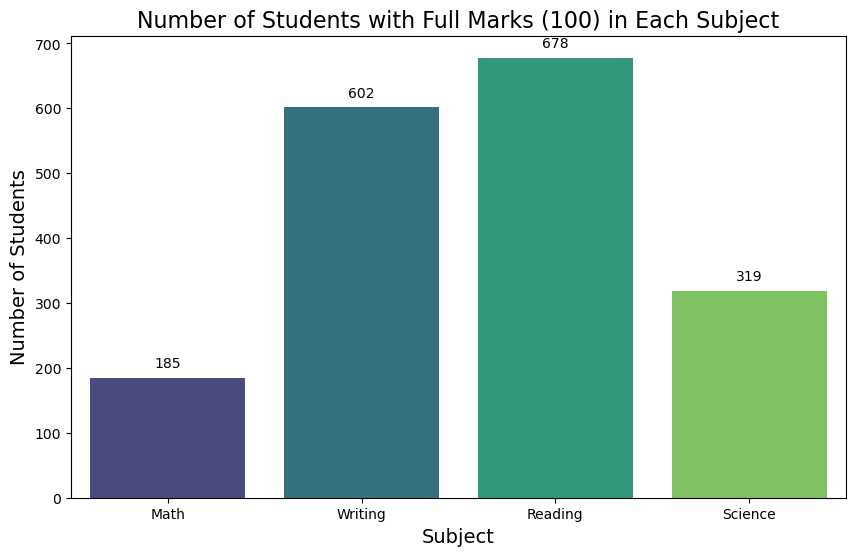

In [16]:
# Create the bar plot with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Subject', y='Count', data=full_marks_df, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Add title and labels
plt.title('Number of Students with Full Marks (100) in Each Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Display the plot
plt.show()

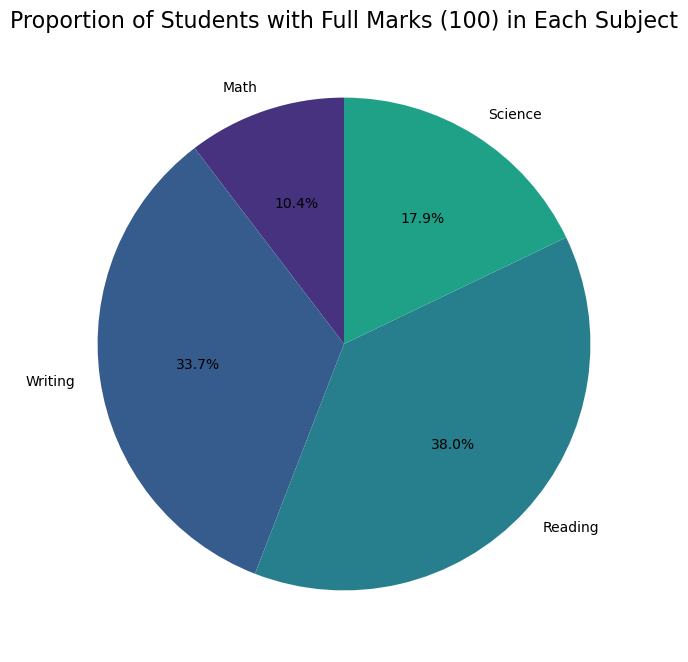

In [17]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(full_marks_df['Count'], labels=full_marks_df['Subject'], autopct='%.1f%%', colors=sns.color_palette('viridis'), startangle=90)

# Add title
plt.title('Proportion of Students with Full Marks (100) in Each Subject', fontsize=16)

# Display the plot
plt.show()

In [18]:
# Calculate the percentage of students with full marks in each subject
total_students = len(df)
percentage_math_full = (math_full / total_students) * 100
percentage_writing_full = (writing_full / total_students) * 100
percentage_reading_full = (reading_full / total_students) * 100
percentage_science_full = (science_full / total_students) * 100


print()
# Print the percentage of students with full marks in each subject
print(f'Percentage of students with full marks in Maths: {percentage_math_full:.2f}%')
print(f'Percentage of students with full marks in Writing: {percentage_writing_full:.2f}%')
print(f'Percentage of students with full marks in Reading: {percentage_reading_full:.2f}%')
print(f'Percentage of students with full marks in science: {percentage_science_full:.2f}%')


Percentage of students with full marks in Maths: 1.85%
Percentage of students with full marks in Writing: 6.02%
Percentage of students with full marks in Reading: 6.78%
Percentage of students with full marks in science: 3.19%


In [19]:
# Unique values for categorical variables
print("\nUnique values for 'gender':", df['gender'].unique())
print("Unique values for 'race_ethnicity':", df['race_ethnicity'].unique())
print("Unique values for 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("Unique values for 'lunch':", df['lunch'].unique())
print("Unique values for 'test_preparation_course':", df['test_preparation_course'].unique())


Unique values for 'gender': ['Male' 'Female']
Unique values for 'race_ethnicity': ['Group D' 'Group B' 'Group C' 'Group E' 'Group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Unique values for 'parental_level_of_education': ['Some college' 'High school' "Master's degree" "Associate's degree"
 "Bachelor's degree"]
Unique values for 'lunch': ['Standard' 'Free/reduced']
Unique values for 'test_preparation_course': ['Complete' 'Not complete']


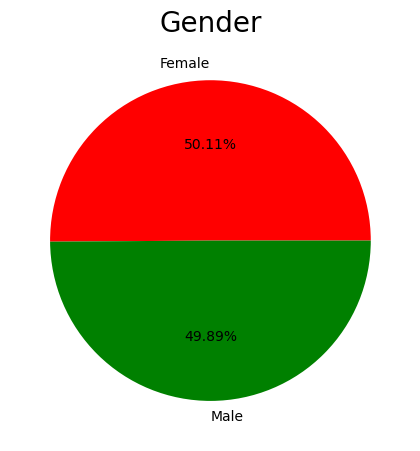

In [20]:
# Set the figure size for the entire plot
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')



# Adjust the layout and display the subplots

plt.grid()
plt.show()

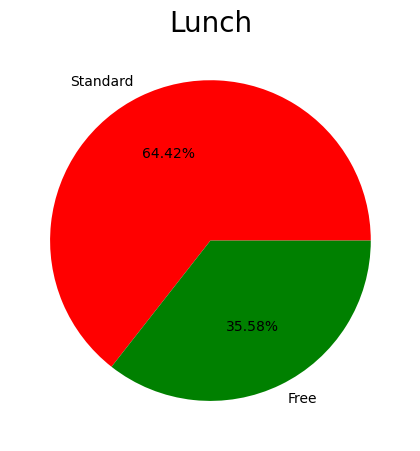

In [21]:
# Continue with similar code blocks for other pie charts

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')
# Adjust the layout and display the subplots

plt.grid()
plt.show()

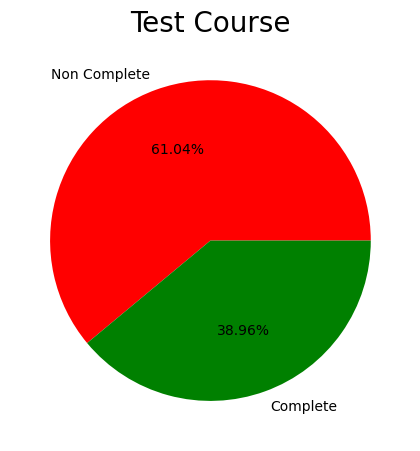

In [22]:
# Continue with similar code blocks for other pie charts


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'Non Complete', 'Complete'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')
# Adjust the layout and display the subplots

plt.grid()
plt.show()

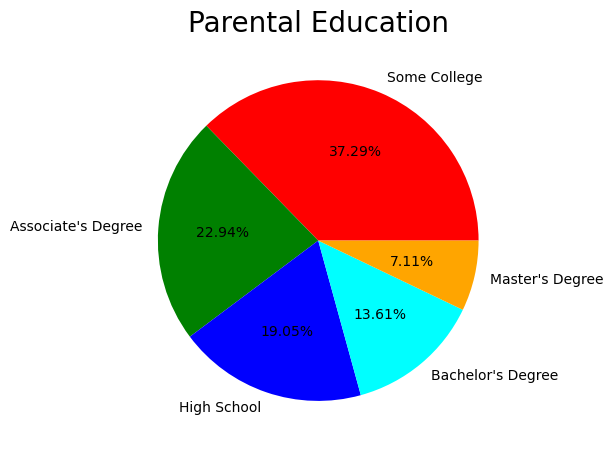

In [23]:

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School',  "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')
# Adjust the layout and display the subplots

plt.grid()
plt.show()

C:\Users\Dell pc\AppData\Local\Temp\ipykernel_5308\4230118922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], data=df, palette=['#1f77b4', '#ff7f0e'], ax=ax[0], saturation=0.95)


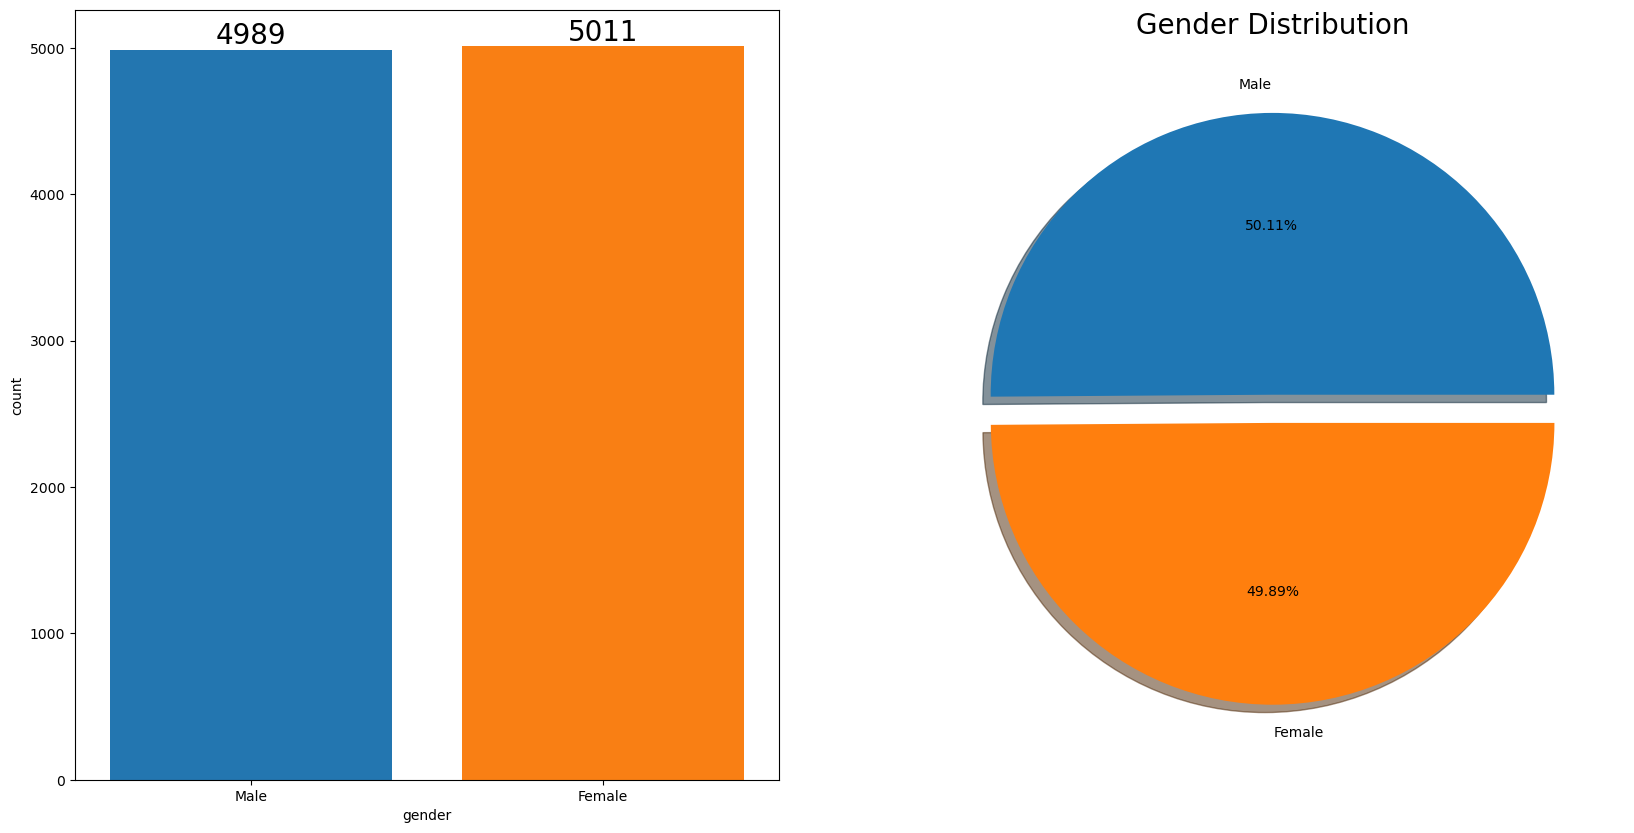

In [24]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender on the left side
sns.countplot(x=df['gender'], data=df, palette=['#1f77b4', '#ff7f0e'], ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for gender distribution on the right side
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
        autopct='%.2f%%', shadow=True, colors=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution', fontsize=20)

# Display the subplots
plt.show()

In [25]:
# Clean and convert 'math_score' to numeric
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
# Calculate IQR for math scores
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['math_score'] < lower_bound) | (df['math_score'] > upper_bound)]
print("Outliers in Math Scores:")
print(outliers)

Outliers in Math Scores:
Empty DataFrame
Columns: [roll_no, gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, science_score, total_score, grade, average]
Index: []


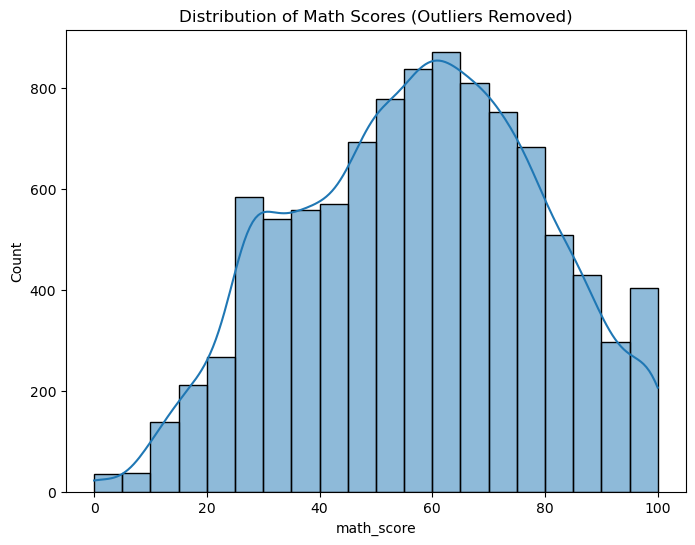

In [26]:
df_cleaned = df[(df['math_score'] >= lower_bound) & (df['math_score'] <= upper_bound)]
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['math_score'], bins=20, kde=True)
plt.title('Distribution of Math Scores (Outliers Removed)')
plt.show()

Unique race/ethnicity categories: ['Group D' 'Group B' 'Group C' 'Group E' 'Group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']


C:\Users\Dell pc\AppData\Local\Temp\ipykernel_5308\3726632345.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')


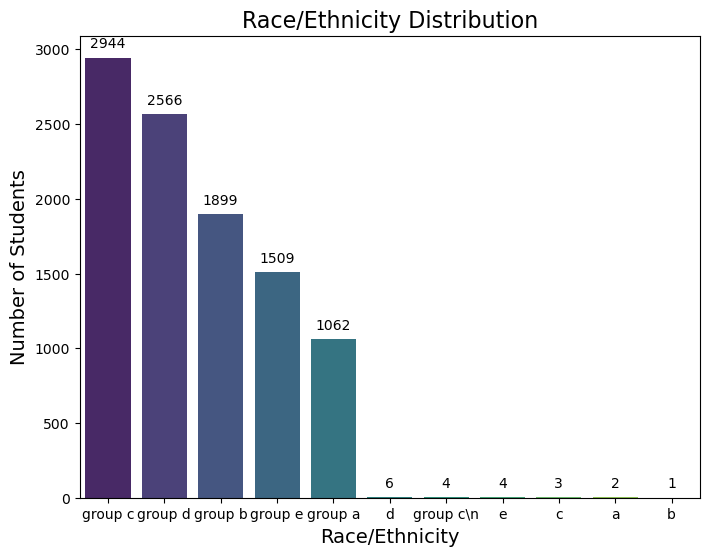

In [27]:
# Check unique values in the race/ethnicity column
print("Unique race/ethnicity categories:", df['race_ethnicity'].unique())

# Clean race/ethnicity data (if necessary)
df['race_ethnicity'] = df['race_ethnicity'].str.strip().str.lower()  # Remove extra spaces and standardize

# Count the frequency of each race/ethnicity
race_counts = df['race_ethnicity'].value_counts()

# Plot the distribution of race/ethnicity
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text to display (count of students)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 10),  # Offset for the text
                textcoords='offset points')  # Coordinate system for the offset

# Add title and labels
plt.title('Race/Ethnicity Distribution', fontsize=16)
plt.xlabel('Race/Ethnicity', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Display the plot
plt.show()

race_ethnicity
a            67.500000
b            28.000000
c            69.000000
d            59.666667
e            57.250000
group a      57.388889
group b      57.676672
group c      57.093071
group c\n    56.500000
group d      56.924006
group e      56.487740
Name: math_score, dtype: float64


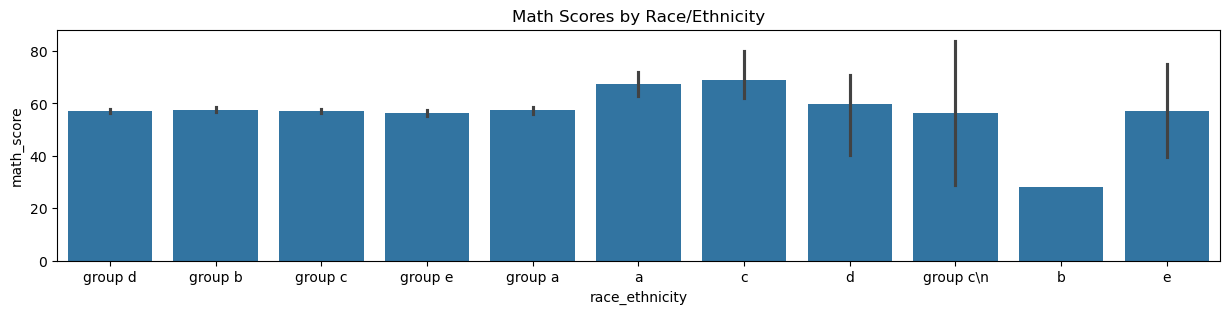

In [28]:
df['race_ethnicity'] = df['race_ethnicity'].str.strip().str.lower()  # Standardize
group_scores = df.groupby('race_ethnicity')['math_score'].mean()
print(group_scores)
plt.figure(figsize=(15, 3))
sns.barplot(x='race_ethnicity', y='math_score', data=df)
plt.title('Math Scores by Race/Ethnicity')
plt.show()

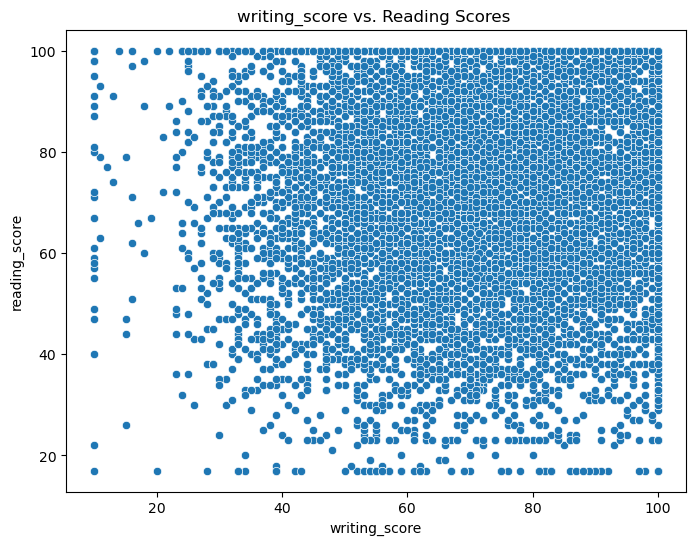

In [29]:

# Scatter plot for math vs. reading scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='writing_score', y='reading_score', data=df)
plt.title('writing_score vs. Reading Scores ')
plt.show()

C:\Users\Dell pc\AppData\Local\Temp\ipykernel_5308\3531704467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='viridis')


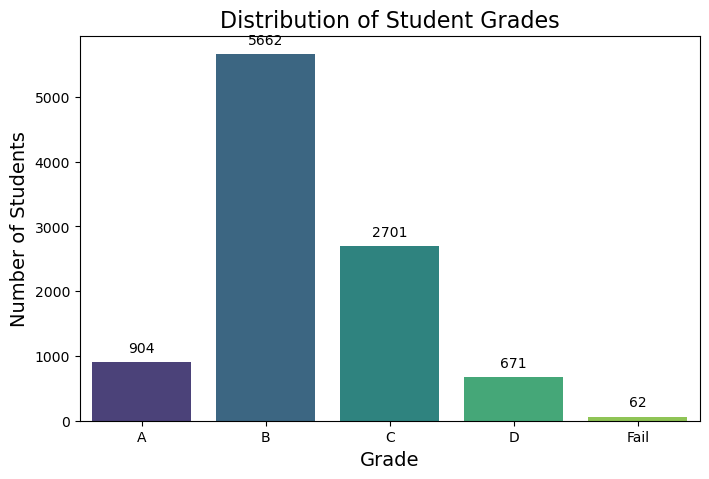

In [30]:
# Count the frequency of each grade
grade_counts = df['grade'].value_counts().sort_index()

# Plot the distribution of grades
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='viridis')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text to display (count of students)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 10),  # Offset for the text
                textcoords='offset points')  # Coordinate system for the offset
# Add title and labels
plt.title('Distribution of Student Grades', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Display the plot
plt.show()

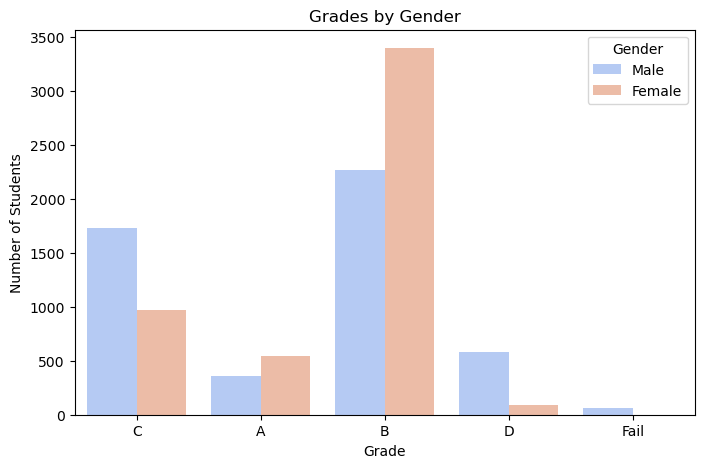

In [31]:
# Step 4: Analyze Grades by Categories
# Example 1: Grades by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='grade', hue='gender', data=df, palette='coolwarm')
plt.title('Grades by Gender')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()

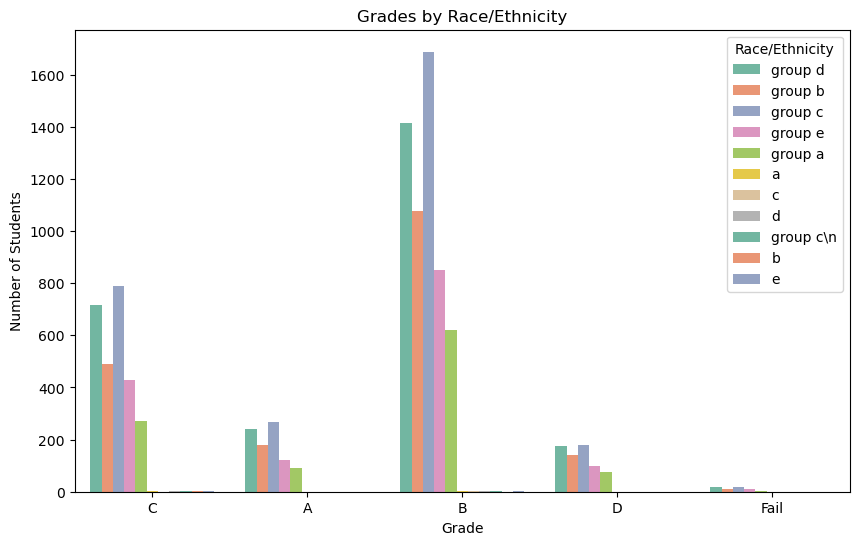

In [32]:
# Example 2: Grades by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='race_ethnicity', data=df, palette='Set2')
plt.title('Grades by Race/Ethnicity')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Race/Ethnicity')
plt.show()

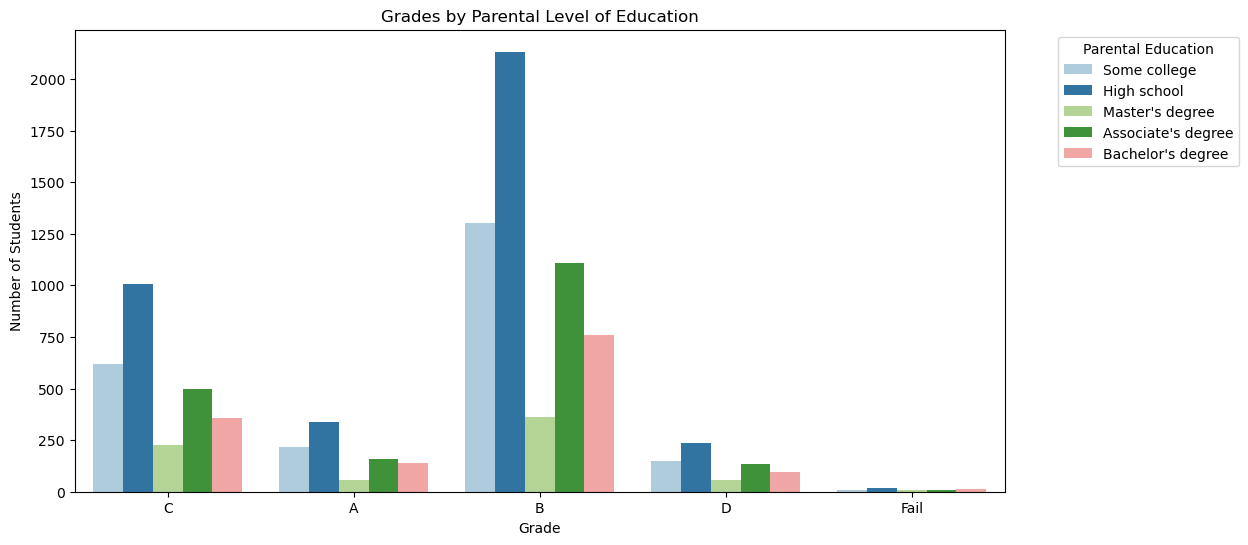

In [33]:
# Example 3: Grades by Parental Level of Education
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='parental_level_of_education', data=df, palette='Paired')
plt.title('Grades by Parental Level of Education')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

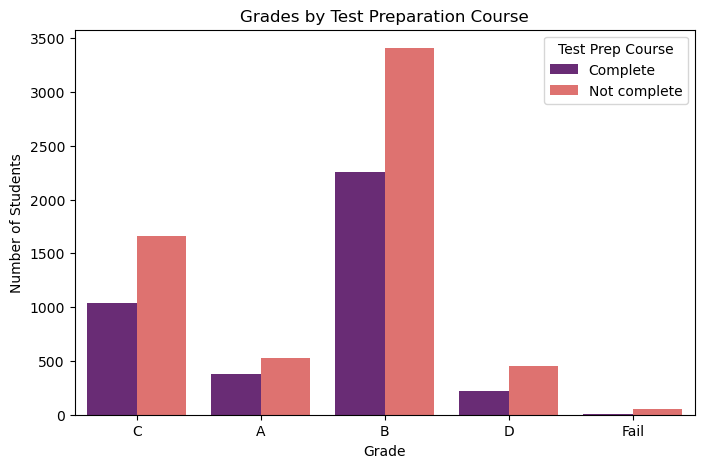

In [34]:
# Example 4: Grades by Test Preparation Course
plt.figure(figsize=(8, 5))
sns.countplot(x='grade', hue='test_preparation_course', data=df, palette='magma')
plt.title('Grades by Test Preparation Course')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Test Prep Course')
plt.show()

In [35]:
parental_education_analysis = df.groupby('parental_level_of_education').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    'writing_score': 'mean',
    'science_score': 'mean',
    'total_score': 'mean'
   
}).reset_index()

print(parental_education_analysis)

  parental_level_of_education  math_score  reading_score  writing_score  \
0          Associate's degree   56.908136      69.915882      71.810847   
1           Bachelor's degree   56.780309      70.001932      71.392970   
2                 High school   57.655940      70.382176      71.578861   
3             Master's degree   54.267229      69.840017      69.233474   
4                Some college   57.443766      70.045936      71.512603   

   science_score  total_score  
0      65.655284   264.325323  
1      66.255145   264.519825  
2      66.326764   265.890031  
3      64.839662   258.357921  
4      66.238177   265.327570  


C:\Users\Dell pc\AppData\Local\Temp\ipykernel_5308\4105872931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education', y='total_score', data=parental_education_analysis, palette='viridis')


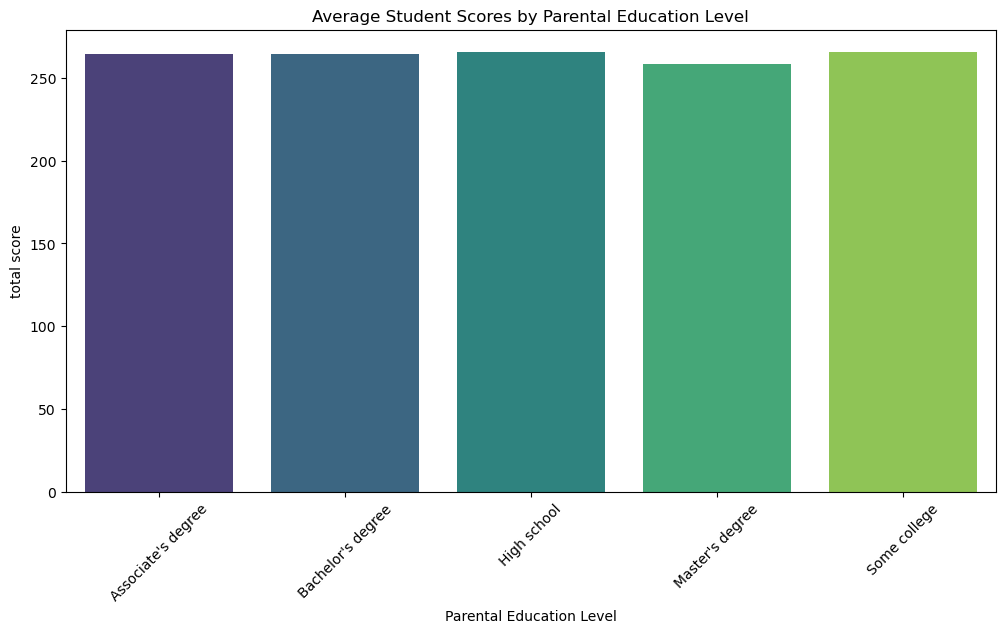

In [36]:
plt.figure(figsize=(12, 6))

sns.barplot(x='parental_level_of_education', y='total_score', data=parental_education_analysis, palette='viridis')
plt.title('Average Student Scores by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('total score')
plt.xticks(rotation=45)
plt.show()

In [37]:

# Select the independent variable (math_score) and dependent variable (total_score)
X = df[['science_score']]  # Independent variable (must be a 2D array)
y = df['total_score']   # Dependent variable


In [38]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict on the test data
y_pred = model.predict(X_test)

In [41]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1222.3985407035261
R-squared (R2): 0.3178336962313092


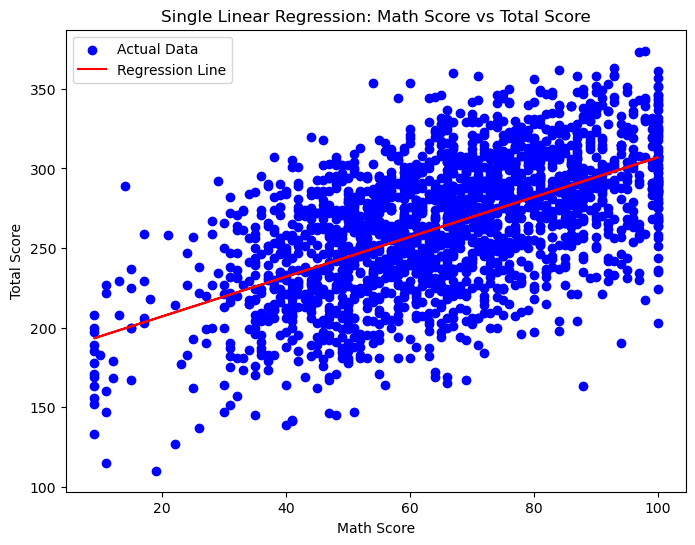

In [42]:

# Step 7: Visualize the Results
# Plot the regression line against the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.title('Single Linear Regression: Math Score vs Total Score')
plt.legend()
plt.show()

In [43]:
# Prepare data for the model
X = df[['math_score', 'reading_score', 'writing_score', 'science_score']]
y = df['total_score']

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make predictions
y_pred = model.predict(X_test)

In [47]:
# Print model coefficients
print("\nStudent Model Coefficients:")
print(f"Slope (m): {model.coef_}")
print(f"Intercept (b): {model.intercept_}")


Student Model Coefficients:
Slope (m): [0.99383306 0.99971695 0.99722068 0.99711947]
Intercept (b): 0.7932100385438048


In [48]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error: 7.757751310149803
R-squared: 0.9956707437381627


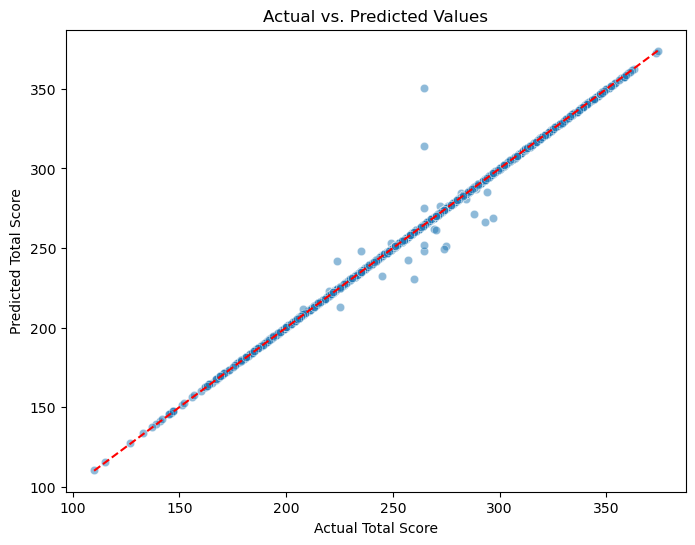

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.show()

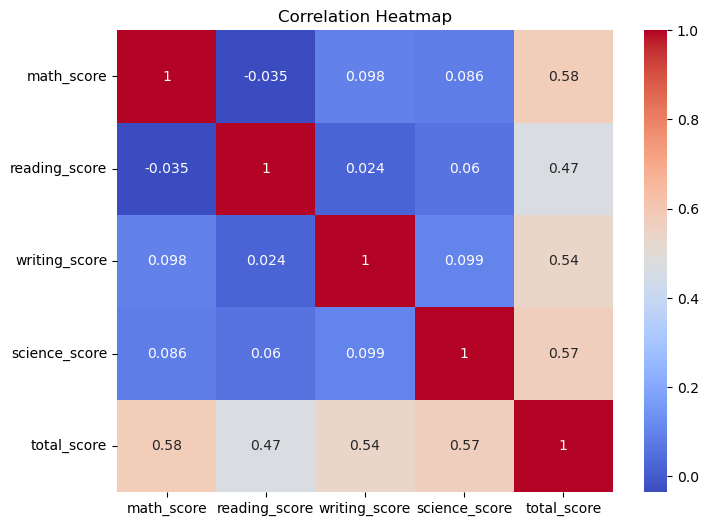

In [50]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()